In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [62]:
df = pd.read_csv(
     "fcc-forum-pageviews.csv",
     parse_dates=["date"],
     usecols=["date", "value"]
).set_index('date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [65]:
df.columns

Index(['value'], dtype='object')

In [66]:
df.info

<bound method DataFrame.info of              value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]>

In [63]:
# df.dt.to_period("M")

In [67]:
clean_df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
clean_df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<function matplotlib.pyplot.show(close=None, block=None)>

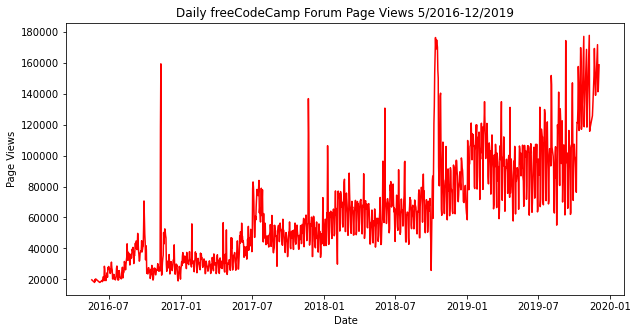

In [79]:
x = clean_df.index
y = clean_df['value']
f, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, color='red')
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show

In [103]:
clean_df['year']=clean_df.index.year
clean_df

/var/folders/wm/pk49b04965j29797p_pxbl7h0000gn/T/ipykernel_42091/111478038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['year']=clean_df.index.year


,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [148]:
clean_df['month']=clean_df.index.month_name()
#print(m)
clean_df


/var/folders/wm/pk49b04965j29797p_pxbl7h0000gn/T/ipykernel_42091/2600107559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['month']=clean_df.index.month_name()


,value,month,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


In [149]:
clean_df.columns


Index(['value', 'month', 'year'], dtype='object')

In [235]:
clean_df.index.sort_values()
clean_df

,value,month,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


In [236]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   value   1238 non-null   int64   
 1   month   1238 non-null   category
 2   year    1238 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 30.6 KB


In [174]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
clean_df['month'] = pd.Categorical(clean_df['month'], categories=months, ordered=True)
clean_df['month'].sort_values()
clean_df


/var/folders/wm/pk49b04965j29797p_pxbl7h0000gn/T/ipykernel_42091/935299010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['month'] = pd.Categorical(clean_df['month'], categories=months, ordered=True)


,value,month,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


In [175]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   value   1238 non-null   int64   
 1   month   1238 non-null   category
 2   year    1238 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 30.6 KB


In [176]:
bar_df = clean_df.groupby(['year', 'month']).mean()
bar_df.reset_index()

,year,month,value
0,2016,January,NaN
1,2016,February,NaN
2,2016,March,NaN
3,2016,April,NaN
4,2016,May,19432.400000
5,2016,June,21875.105263
6,2016,July,24109.678571
7,2016,August,31049.193548
8,2016,September,41476.866667
9,2016,October,27398.322581


In [191]:
bar_df = bar_df.dropna().reset_index()
bar_df

,index,year,month,value
0,0,2016,May,19432.400000
1,1,2016,June,21875.105263
2,2,2016,July,24109.678571
3,3,2016,August,31049.193548
4,4,2016,September,41476.866667
5,5,2016,October,27398.322581
6,6,2016,November,40448.633333
7,7,2016,December,27832.419355
8,8,2017,January,32785.161290
9,9,2017,February,31113.071429


In [183]:
df_pivot = pd.pivot_table(
        bar_df,
        values='value',
        index='year',
        columns='month',
        aggfunc=np.mean
)

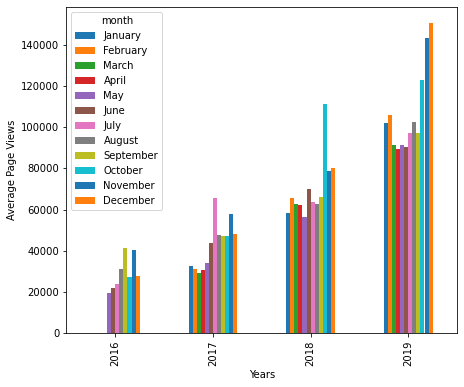

In [195]:
ax = df_pivot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(7, 6)
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
plt.show()

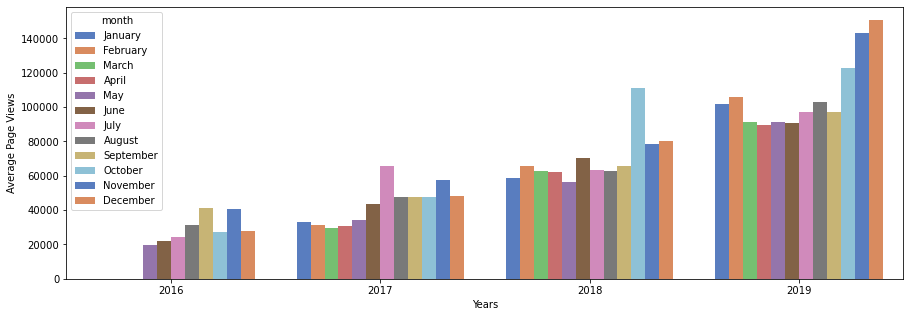

In [228]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x="year", y="value", hue="month", data=bar_df,
                hue_order=months, ci="sd", palette='muted')
ax.set(xlabel="Years", ylabel="Average Page Views")
plt.show()

In [192]:
bar_df.head()

,index,year,month,value
0,0,2016,May,19432.400000
1,1,2016,June,21875.105263
2,2,2016,July,24109.678571
3,3,2016,August,31049.193548
4,4,2016,September,41476.866667


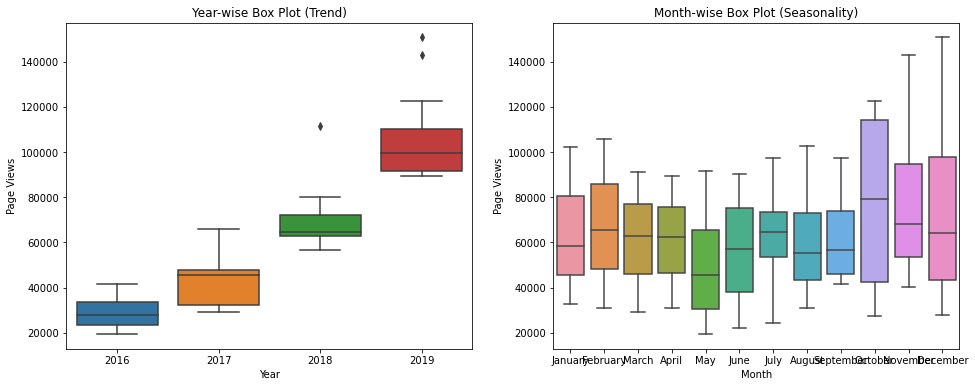

In [221]:
# boxplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='year', y='value', data=bar_df, ax=ax[0])
ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(y="value", x="month", data=bar_df, ax=ax[1])
ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
plt.show()

In [243]:
df_box = clean_df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


In [244]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
 2   month   1238 non-null   object        
 3   year    1238 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 38.8+ KB


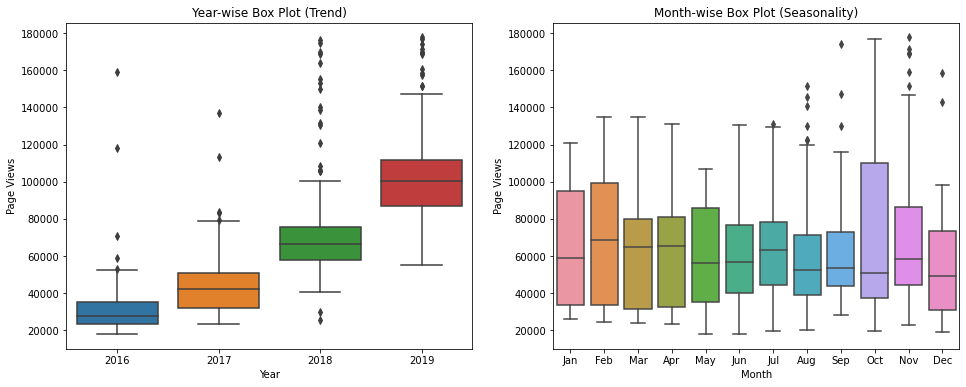

In [247]:
# boxplot
df_box['monthnumber'] = clean_df.index.month
df_box = df_box.sort_values('monthnumber')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='year', y='value', data=df_box, ax=ax[0])
ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(y="value", x="month", data=df_box, ax=ax[1])
ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
plt.show()